In [104]:
import numpy as np
import pandas as pd
import yfinance as yf
import pypfopt
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import risk_models
import streamlit as st
import matplotlib.pyplot as plt
from pypfopt import plotting

In [105]:
tickers = ['TSM','AAPL','AMD','BABA', 'SPY', 'V','QQQ']

In [106]:
data =yf.download(tickers, start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  7 of 7 completed


In [107]:
data.head()

Adj Close                                                 \
                 AAPL        AMD        BABA         QQQ         SPY   
Date                                                                   
2020-01-02  73.785919  49.099998  219.770004  213.231750  312.395020   
2020-01-03  73.068565  48.599998  217.000000  211.278610  310.029480   
2020-01-06  73.650780  48.389999  216.639999  212.639893  311.212280   
2020-01-07  73.304413  48.250000  217.630005  212.610321  310.337219   
2020-01-08  74.483612  47.830002  218.000000  214.208344  311.991211   

                                       Close                         ...  \
                  TSM           V       AAPL        AMD        BABA  ...   
Date                                                                 ...   
2020-01-02  56.990177  188.125137  75.087502  49.099998  219.770004  ...   
2020-01-03  55.110760  186.628967  74.357498  48.599998  217.000000  ...   
2020-01-06  54.474796  186.225372  74.949997  48.389999  216.639999  ...   
2020-01-07  55.357552  185.733215  74.597504  48.250000  217.630005  ...   
2020-01-08  55.765709  188.912628  75.797501  47.830002  218.000000  ...   

                  Open                            Volume                      \
                   SPY        TSM           V       AAPL       AMD      BABA   
Date                                                                           
2020-01-02  323.540009  59.599998  189.000000  135480400  80331100  15873500   
2020-01-03  321.160004  58.970001  188.410004  146322800  73127400   8604500   
2020-01-06  320.489990  57.599998  188.000000  118387200  47934900  11885500   
2020-01-07  323.019989  57.450001  189.589996  108872000  58061400   9388000   
2020-01-08  322.940002  58.189999  189.490005  132079200  53767000  11959100   

                                                    
                 QQQ       SPY       TSM         V  
Date                                                
2020-01-02  30969400  59151200   8432600   8733000  
2020-01-03  27518900  77709700  10546400   4899700  
2020-01-06  21655300  55653900   8897200  10109500  
2020-01-07  22139300  40496400   7444300   4392300  
2020-01-08  26397300  68296000   5381500   5712000  

[5 rows x 42 columns]

In [108]:
data2 = data['Adj Close']

In [109]:
mu =pypfopt.expected_returns.mean_historical_return(data2)

In [110]:
data2.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [111]:
cov =pypfopt.risk_models.sample_cov(data2)
w = np.array([0,.9,0,0,0,.05,.08])

In [112]:
cov

,AAPL,AMD,BABA,QQQ,SPY,TSM,V
AAPL,0.140659,0.118143,0.056898,0.093483,0.075901,0.083030,0.079917
AMD,0.118143,0.275616,0.068735,0.105688,0.080416,0.127110,0.081295
BABA,0.056898,0.068735,0.182677,0.053732,0.042252,0.055270,0.047043
QQQ,0.093483,0.105688,0.053732,0.080224,0.066057,0.076522,0.071551
SPY,0.075901,0.080416,0.042252,0.066057,0.064389,0.063877,0.073893
TSM,0.083030,0.127110,0.055270,0.076522,0.063877,0.158501,0.066570
V,0.079917,0.081295,0.047043,0.071551,0.073893,0.066570,0.120471


In [113]:
w


array([0.  , 0.9 , 0.  , 0.  , 0.  , 0.05, 0.08])

In [114]:
w_min =np.array([-.1,-.2,-.2,-.10,.2,-.05,-.05])

In [115]:
rf =.03

In [116]:
ef = EfficientFrontier(mu, cov,weight_bounds=(0,1))
# ef.add_constraint(lambda x: x <= w)
# ef.add_constraint(lambda y: y >= w_min)
# ef.add_constraint(lambda y: y >= w_min)
# ef.add_constraint(lambda y: y >= w_min)

In [117]:
sharpe =ef.max_sharpe(risk_free_rate=rf)


In [118]:
ef.portfolio_performance(risk_free_rate= rf, verbose=True)

Expected annual return: 60.1%
Annual volatility: 37.5%
Sharpe Ratio: 1.52


(0.6007962221120701, 0.37525492884991624, 1.521089206906489)

In [119]:
ef2 = EfficientFrontier(mu, cov,weight_bounds=(0,1))
ef2.add_constraint(lambda x: x <= w)
# ef2.add_constraint(lambda x: x >= w_min)


In [120]:
w

array([0.  , 0.9 , 0.  , 0.  , 0.  , 0.05, 0.08])

In [121]:
maxr = ef2.efficient_risk(.3,market_neutral=True)

C:\Users\shane\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:176: RuntimeWarning: Market neutrality requires shorting - bounds have been amended
  warnings.warn(


In [122]:
maxr

OrderedDict([('AAPL', -3.088004e-10),
             ('AMD', 0.5698164930705245),
             ('BABA', -0.4483532115557538),
             ('QQQ', -5.602539e-10),
             ('SPY', -9.360236e-10),
             ('TSM', 0.0499999994459332),
             ('V', -0.1714632791558994)])

In [123]:
ef2.portfolio_performance(risk_free_rate=rf, verbose=True)

Expected annual return: 53.4%
Annual volatility: 30.0%
Sharpe Ratio: 1.68


(0.5337125769833772, 0.2999999998675236, 1.6790419240193684)

In [124]:
from cvxpy import SCS

In [125]:
maxr = ef2.efficient_risk(.3,market_neutral=True)

In [126]:
maxr

OrderedDict([('AAPL', -3.088004e-10),
             ('AMD', 0.5698164930705245),
             ('BABA', -0.4483532115557538),
             ('QQQ', -5.602539e-10),
             ('SPY', -9.360236e-10),
             ('TSM', 0.0499999994459332),
             ('V', -0.1714632791558994)])

In [127]:
ef2.portfolio_performance(risk_free_rate=rf, verbose=True)

Expected annual return: 53.4%
Annual volatility: 30.0%
Sharpe Ratio: 1.68


(0.5337125769833772, 0.2999999998675236, 1.6790419240193684)

In [128]:
from cvxpy import SCS

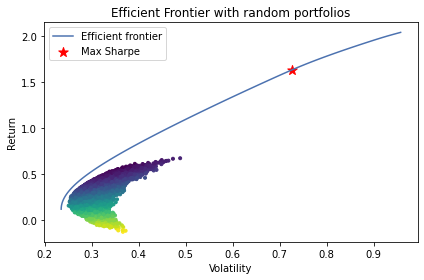

In [150]:
import copy

mu = expected_returns.mean_historical_return(data2)
S = risk_models.sample_cov(data2)
ef4 = EfficientFrontier(mu,S,weight_bounds=(None,None))
# ef4.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)



fig, ax = plt.subplots()
ef_max_sharpe = copy.deepcopy(ef4)
plotting.plot_efficient_frontier(ef4, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 30000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef4.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()